In [1]:
import sys
import numpy as np
from Bio import SeqIO # Used for reading sequences froms file
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import gudhi

In [2]:
records = list(SeqIO.parse("sequences.fasta", "fasta"))
num_records = len(records)

In [3]:
print(records[0].seq)

CGTCCTACTGATAGTGTGTCCTCCTCGGGAACCAAACCCGGTAAACCAGGAAAGCGGGAGCGTGCTGCGGCTAAGTCCGCAGTTGGAAGTTCGGGTGGACAACCTGGTTCCAGTGCAAAAGCCAAAGCTTTTGCATTCGGCTCAAGTGACCCTGTGCCAATGCCCGGTCAGTTTCCTGTCGTTTTTCAGACAGGTGCTGGTGAACCAACTCGTGATCAGGAGTTTGCCTTAGATACTCCTGAATTGTCCAAACAGTTTCCATCTGTGACGGACCGGTATACTCGTAACCCGAAGTATGCTGAATTTCGAGCCAACGCCCAGCTGACCAATGGGCAGTTTGGAACACATATCAGTGCTGCCTTCTTTCTGCGTTTGGCCCAGCAGATAGTACATTCCCATGTAAATATGGGCCTACCCCAAGGCGATTTCGCACCAATCGCCAGCTCCGACGTTCGTATTCCGGCGGGTCTCGCCTCAATTACGAGCCAATTTGGAGAGTTCTCCTCTCCAACAATCGGAACGCGCTTTCTGCTTCGTGATTACGAAGCAACCGTATCAAAGTTAGTGTTTATCGCTGACAAGATGTGGTCGGAAGGCGCAAACCGTGATATCATTCGGAGATCCTGGTTGCCCATGTCTAGTTCAGACGAGTCAACTAAGGTTTTAGTTGCCGAGGCATTGCTTCGTTTCATTGAAACAGCAGATGTCTCAATCAGTACCAACATCTTGGAAGAAGGTGTGTTATCAGGTACTGTGCCCGATGCTTGGGAGAGCATCAAGAGTGTGCTCGGTGAAGAACCAGCTGCAGGACAAGTTGATAGGCGTGATCGCTTTGATTTCTTGTTCAAAAGTTATGCGGATGTGGGGCAGTTTGTGACAACATTCTCCTCCACTGCATCAGCTGCCGTCCTCGACGAACTCGACCTTGACTGGGTTAGCCCTTCAGCTGGGCACCTTGATTGGTCATACTCCCCGGAAACGAGGTTTTCATATCTCGCAG

In [5]:
seq_strings = [record.seq for record in records]

In [6]:
type(seq_strings[0])

Bio.Seq.Seq

## Basic Distance Matrix Created with Hamming Distances

In [7]:
# Otherwise known as the "p-distance"
def hamming(seq_a: str, seq_b: str) -> float:
    n = len(seq_a)
    nd = 0 # Number of differences
    for nucleo_a, nucleo_b in zip(seq_a, seq_b):
        if nucleo_a != nucleo_b:
            nd += 1
    return nd/n # Normalized
    

In [8]:
len(seq_strings)

94

In [9]:
# Make an upper-triangular distance matrix
basic_matrix = np.zeros((num_records, num_records))
for i, seq1 in enumerate(seq_strings):
    for j, seq2 in enumerate(seq_strings[i:]):
        basic_matrix[i, j + i] = hamming(seq1, seq2)

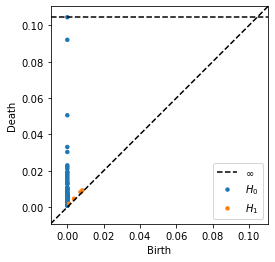

<Figure size 640x480 with 0 Axes>

In [10]:
diagram_hamming = ripser(basic_matrix, maxdim=1, distance_matrix=True, do_cocycles=True)
plot_diagrams(diagram_hamming['dgms'], show=True)
plt.savefig('persist_dia.png')

In [11]:
diagram_hamming['dgms']

[array([[0.        , 0.00091912],
        [0.        , 0.00091912],
        [0.        , 0.00091912],
        [0.        , 0.00091912],
        [0.        , 0.00091912],
        [0.        , 0.00091912],
        [0.        , 0.00091912],
        [0.        , 0.00091912],
        [0.        , 0.00091912],
        [0.        , 0.00091912],
        [0.        , 0.00091912],
        [0.        , 0.00183824],
        [0.        , 0.00183824],
        [0.        , 0.00183824],
        [0.        , 0.00183824],
        [0.        , 0.00183824],
        [0.        , 0.00183824],
        [0.        , 0.00183824],
        [0.        , 0.00275735],
        [0.        , 0.00275735],
        [0.        , 0.00275735],
        [0.        , 0.00275735],
        [0.        , 0.00275735],
        [0.        , 0.00275735],
        [0.        , 0.00367647],
        [0.        , 0.00367647],
        [0.        , 0.00367647],
        [0.        , 0.00367647],
        [0.        , 0.00367647],
        [0.   

In [12]:
H0 = [(0, (birth, death)) for birth, death in diagram_hamming['dgms'][0]]
H1 = [(1, (birth, death)) for birth, death in diagram_hamming['dgms'][1]]
hamming_barcode = H0 + H1

### H0 and H1 plotted together

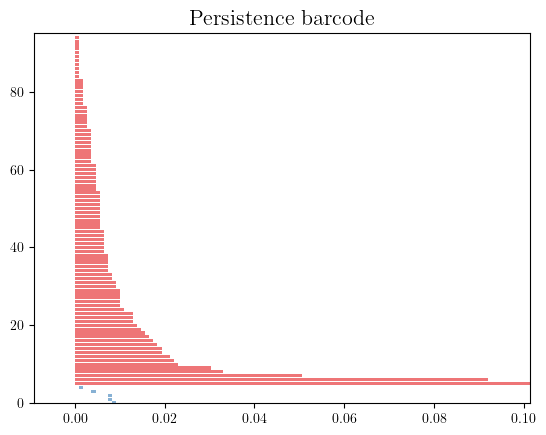

In [13]:
gudhi.plot_persistence_barcode(hamming_barcode)
plt.show()

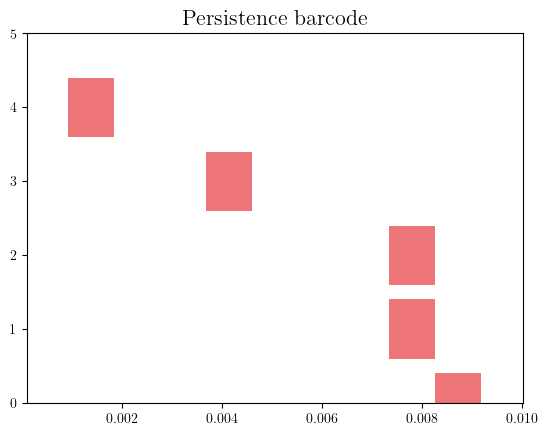

In [14]:
gudhi.plot_persistence_barcode(diagram_hamming['dgms'][1])
plt.show()

In [15]:
r = ripser(basic_matrix, maxdim=1, distance_matrix=True, do_cocycles=True)
#cocycles = r['cocycles']
#D = r['dperm2all']
r['cocycles'][1]

[array([[17,  0,  1]]),
 array([[ 9,  1,  1],
        [10,  1,  1]]),
 array([[24, 11,  1],
        [23, 11,  1],
        [20, 11,  1]]),
 array([[38, 35,  1],
        [39, 35,  1]]),
 array([[27, 20,  1]])]

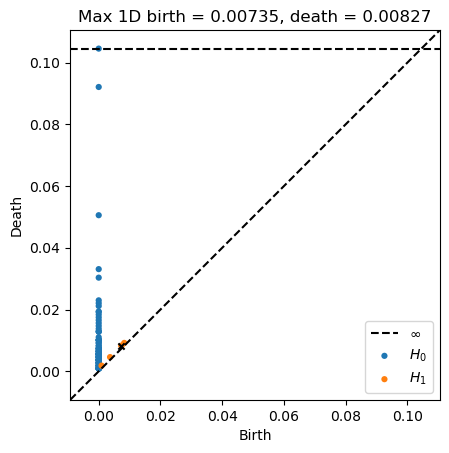

In [19]:
diagrams = r['dgms']
dgm1 = diagrams[1]
idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
plot_diagrams(diagrams, show = False)
plt.scatter(dgm1[idx, 0], dgm1[idx, 1], 20, 'k', 'x')
plt.title("Max 1D birth = %.3g, death = %.3g"%(dgm1[idx, 0], dgm1[idx, 1]))
plt.savefig('persist_dia.png')

In [16]:
r

{'dgms': [array([[0.        , 0.00091912],
         [0.        , 0.00091912],
         [0.        , 0.00091912],
         [0.        , 0.00091912],
         [0.        , 0.00091912],
         [0.        , 0.00091912],
         [0.        , 0.00091912],
         [0.        , 0.00091912],
         [0.        , 0.00091912],
         [0.        , 0.00091912],
         [0.        , 0.00091912],
         [0.        , 0.00183824],
         [0.        , 0.00183824],
         [0.        , 0.00183824],
         [0.        , 0.00183824],
         [0.        , 0.00183824],
         [0.        , 0.00183824],
         [0.        , 0.00183824],
         [0.        , 0.00275735],
         [0.        , 0.00275735],
         [0.        , 0.00275735],
         [0.        , 0.00275735],
         [0.        , 0.00275735],
         [0.        , 0.00275735],
         [0.        , 0.00367647],
         [0.        , 0.00367647],
         [0.        , 0.00367647],
         [0.        , 0.00367647],
         [0.

## Tamura-Nei Distances Matrix:

In [17]:
# Clone https://github.com/sdwfrost/libtn93 into current directory
sys.path.append("./libtn93/python") 
from tn93 import tn93

t_nei_matrix = np.zeros((num_records, num_records))
for i, seq1 in enumerate(seq_strings):
    for j, seq2 in enumerate(seq_strings[i:]):
        t_nei_matrix[i, j + i] = tn93(str(seq1), str(seq2), len(seq1), 0, 100)

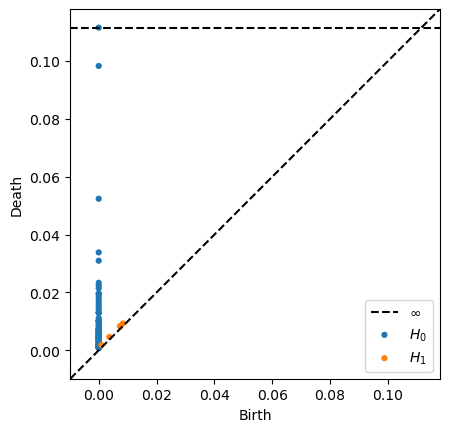

In [47]:
diagram_tamura_nei = ripser(t_nei_matrix, distance_matrix=True, do_cocycles=True)
plot_diagrams(diagram_tamura_nei['dgms'], show=True)
plt.show()

In [19]:
diagram_tamura_nei

{'dgms': [array([[0.        , 0.00091975],
         [0.        , 0.00091975],
         [0.        , 0.00091975],
         [0.        , 0.00091975],
         [0.        , 0.00091975],
         [0.        , 0.00091975],
         [0.        , 0.00091975],
         [0.        , 0.00091975],
         [0.        , 0.00092085],
         [0.        , 0.00092085],
         [0.        , 0.00092086],
         [0.        , 0.00184078],
         [0.        , 0.00184078],
         [0.        , 0.00184078],
         [0.        , 0.00184136],
         [0.        , 0.00184148],
         [0.        , 0.00184163],
         [0.        , 0.00184515],
         [0.        , 0.00276308],
         [0.        , 0.00276308],
         [0.        , 0.00276308],
         [0.        , 0.00276323],
         [0.        , 0.00276333],
         [0.        , 0.00276663],
         [0.        , 0.0036858 ],
         [0.        , 0.0036858 ],
         [0.        , 0.00368637],
         [0.        , 0.00368637],
         [0.

In [20]:
H0_tn = [(0, (birth, death)) for birth, death in diagram_tamura_nei['dgms'][0]]
H1_tn = [(1, (birth, death)) for birth, death in diagram_tamura_nei['dgms'][1]]
tamura_nei_barcode = H0_tn + H1_tn

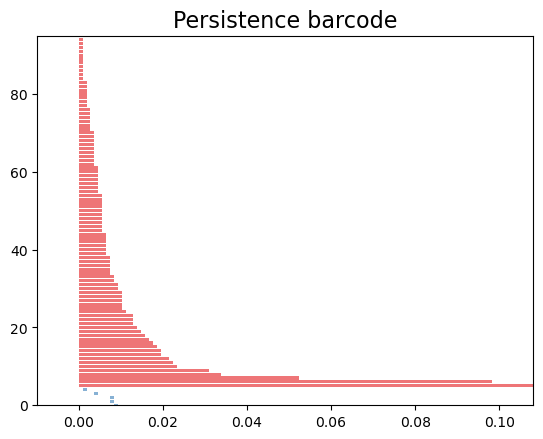

In [21]:
# H0 and H1 plotted together
gudhi.plot_persistence_barcode(tamura_nei_barcode)
plt.show()

<AxesSubplot:title={'center':'Persistence barcode'}>

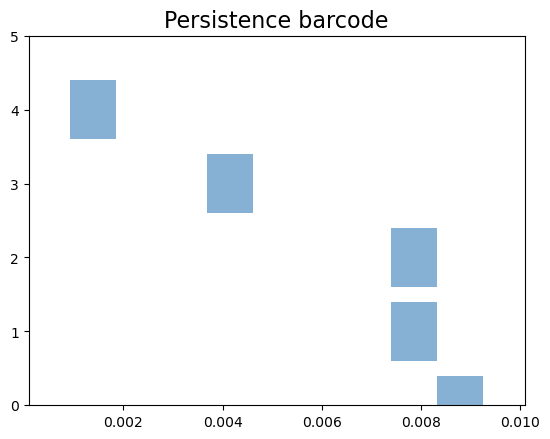

In [22]:
blue = ((0.21568627450980393, 0.49411764705882355, 0.7215686274509804), (0, 0, 0))
gudhi.plot_persistence_barcode(diagram_tamura_nei['dgms'][1], colormap=blue)


In [23]:
import matplotlib
matplotlib.cm.Set1.colors[1]

(0.21568627450980393, 0.49411764705882355, 0.7215686274509804)

In [48]:
np.savetxt('matrix', basic_matrix, fmt='%.20f', delimiter=', ')

In [39]:
basic_matrix

array([[0.        , 0.01930147, 0.01470588, ..., 0.03492647, 0.05698529,
        0.04779412],
       [0.        , 0.        , 0.00643382, ..., 0.03584559, 0.05422794,
        0.04503676],
       [0.        , 0.        , 0.        , ..., 0.03125   , 0.05147059,
        0.04136029],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.07352941,
        0.05882353],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.08363971],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])